## Example 2: Plot data from an NWW3 GRiB2 file
### This example requires that you download a GRiB2 file from either our NOMADS data server or the Production FTP Server (see our Data Access page for more information. For this exercise, I used the file multi_1.at_10m.t00z.f000.grib2 retrieved from NOMADS.This example assumes that the GRiB2 file is in the current working directory.Begin by importing the necessary modules and set up the figure

In [1]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
%matplotlib inline

plt.figure()

os.system("wget -O multi_1.at_10m.t00z.f000.grib2 https://nomads.ncep.noaa.gov/pub/data/nccf/com/wave/prod/multi_1.20190325/multi_1.at_10m.t00z.f000.grib2")
grib='multi_1.at_10m.t00z.f000.grib2';
grbs=pygrib.open(grib)
#In this example we will extract the same significant wave height field we used in the first example. 
#Remember that indexing in Python starts at zero.
grb = grbs.select(name='Significant height of wind waves')[0]
data=grb.values
lat,lon = grb.latlons()

<Figure size 432x288 with 0 Axes>

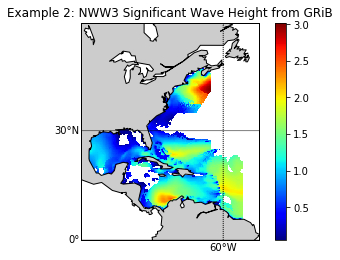

In [2]:

#From this point on the code is almost identical to the previous example.
#Plot the field using Basemap. Start with setting the map projection using the limits of the lat/lon data itself:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

#Convert the lat/lon values to x/y projections.
x, y = m(lon,lat)

#Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)

#Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

#Add a colorbar and title, and then show the plot.
plt.colorbar(cs,orientation='vertical')
plt.title('Example 2: NWW3 Significant Wave Height from GRiB')
plt.show()
#You should see this image in your figure window: 